In [2]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("./yellow_cab_data/yellow_cab_data.csv")
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2022-01-01 00:17:55,2022-01-01 00:27:45,1.0,4.22,1.0,N,138,92,2,14.00,0.5,0.5,0.00,0.00,0.3,16.55,0.0,1.25
1,2,2022-01-01 00:22:03,2022-01-01 00:25:37,1.0,0.69,1.0,N,236,262,1,4.50,0.5,0.5,1.66,0.00,0.3,9.96,2.5,0.00
2,2,2022-01-01 00:52:33,2022-01-01 00:58:07,1.0,0.87,1.0,N,141,229,1,5.50,0.5,0.5,2.32,0.00,0.3,11.62,2.5,0.00
3,2,2022-01-01 00:31:12,2022-01-02 00:00:58,1.0,3.03,1.0,N,79,261,2,15.00,0.5,0.5,0.00,0.00,0.3,18.80,2.5,0.00
4,2,2022-01-01 00:05:26,2022-01-01 00:29:05,1.0,4.56,1.0,N,50,79,1,18.50,0.5,0.5,4.46,0.00,0.3,26.76,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2,2022-01-31 23:13:58,2022-01-31 23:35:37,NaN,5.58,NaN,NaN,158,262,0,24.63,0.0,0.5,2.00,0.00,0.3,29.93,NaN,NaN
149996,2,2022-01-31 23:31:00,2022-01-31 23:43:00,NaN,1.67,NaN,NaN,164,50,0,9.36,0.0,0.5,1.35,0.00,0.3,14.01,NaN,NaN
149997,2,2022-01-31 23:10:00,2022-01-31 23:20:00,NaN,2.02,NaN,NaN,170,50,0,10.40,0.0,0.5,1.46,0.00,0.3,15.16,NaN,NaN
149998,2,2022-01-31 23:53:00,2022-02-01 00:10:00,NaN,4.84,NaN,NaN,158,265,0,23.71,0.0,0.0,7.69,11.75,0.3,43.45,NaN,NaN


In [3]:
def analysis_continuous(col_vals):
    return np.nanmean(col_vals), np.nanvar(col_vals)

In [4]:
def get_meanvarvecs(df):
    return df.apply(analysis_continuous, axis=0).transpose().values

In [5]:
def cosine_similarity(vec1, vec2):
    cosine = np.dot(vec1,vec2)/(norm(vec1)*norm(vec2))
    return cosine

In [6]:
def get_similarity_score(vecs1, vecs2):
    score = 0
    for i in range(len(vecs1)):
        score += cosine_similarity(vecs1[i], vecs2[i])
    return score/len(vecs1)

In [7]:
df.columns, len(list(df.columns))

(Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
        'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
        'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
        'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
        'total_amount', 'congestion_surcharge', 'airport_fee'],
       dtype='object'),
 19)

In [8]:
datatypes = []
for col in df.columns:
    datatypes.append(str(type(df.loc[0,col])))
datatypes

["<class 'numpy.int64'>",
 "<class 'str'>",
 "<class 'str'>",
 "<class 'numpy.float64'>",
 "<class 'numpy.float64'>",
 "<class 'numpy.float64'>",
 "<class 'str'>",
 "<class 'numpy.int64'>",
 "<class 'numpy.int64'>",
 "<class 'numpy.int64'>",
 "<class 'numpy.float64'>",
 "<class 'numpy.float64'>",
 "<class 'numpy.float64'>",
 "<class 'numpy.float64'>",
 "<class 'numpy.float64'>",
 "<class 'numpy.float64'>",
 "<class 'numpy.float64'>",
 "<class 'numpy.float64'>",
 "<class 'numpy.float64'>"]

In [9]:
categ = []
for i in range(len(datatypes)):
    t = datatypes[i]
    if t == "<class 'numpy.int64'>" or t == "<class 'numpy.float64'>":
        pass
    else:    
        categ.append(df.columns[i])
categ

['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag']

In [10]:
#convert datetimes to integer values
df['tpep_pickup_float'] = pd.to_datetime(df[categ[0]]).map(pd.Timestamp.timestamp)
df['tpep_dropoff_float'] = pd.to_datetime(df[categ[1]]).map(pd.Timestamp.timestamp)

In [11]:
#convert binary store and fwd flag to int
def convert_yn(x):
    if x=="Y":
        return 1
    elif x=="N":
        return 0
    else:
        return np.nan
df['store_and_fwd_flag_bin'] = df[categ[2]].apply(convert_yn)

In [12]:
data = df.drop(categ, axis=1)
data

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tpep_pickup_float,tpep_dropoff_float,store_and_fwd_flag_bin
0,2,1.0,4.22,1.0,138,92,2,14.00,0.5,0.5,0.00,0.00,0.3,16.55,0.0,1.25,1.640996e+09,1.640997e+09,0.0
1,2,1.0,0.69,1.0,236,262,1,4.50,0.5,0.5,1.66,0.00,0.3,9.96,2.5,0.00,1.640997e+09,1.640997e+09,0.0
2,2,1.0,0.87,1.0,141,229,1,5.50,0.5,0.5,2.32,0.00,0.3,11.62,2.5,0.00,1.640998e+09,1.640999e+09,0.0
3,2,1.0,3.03,1.0,79,261,2,15.00,0.5,0.5,0.00,0.00,0.3,18.80,2.5,0.00,1.640997e+09,1.641082e+09,0.0
4,2,1.0,4.56,1.0,50,79,1,18.50,0.5,0.5,4.46,0.00,0.3,26.76,2.5,0.00,1.640996e+09,1.640997e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2,NaN,5.58,NaN,158,262,0,24.63,0.0,0.5,2.00,0.00,0.3,29.93,NaN,NaN,1.643671e+09,1.643672e+09,NaN
149996,2,NaN,1.67,NaN,164,50,0,9.36,0.0,0.5,1.35,0.00,0.3,14.01,NaN,NaN,1.643672e+09,1.643673e+09,NaN
149997,2,NaN,2.02,NaN,170,50,0,10.40,0.0,0.5,1.46,0.00,0.3,15.16,NaN,NaN,1.643671e+09,1.643671e+09,NaN
149998,2,NaN,4.84,NaN,158,265,0,23.71,0.0,0.0,7.69,11.75,0.3,43.45,NaN,NaN,1.643673e+09,1.643674e+09,NaN


In [13]:
data.columns, len(data.columns)

(Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
        'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
        'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
        'total_amount', 'congestion_surcharge', 'airport_fee',
        'tpep_pickup_float', 'tpep_dropoff_float', 'store_and_fwd_flag_bin'],
       dtype='object'),
 19)

In [14]:
for col in data.columns:
    print(str(type(data.loc[0,col])))

<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


<h1> Approach 1: Total Differential Privacy </h1>

<h3> Algorithm 1: Total Anonymity (Dummy) </h3>

In [15]:
means = data.apply(analysis_continuous, axis=0).loc[0, :].values
alg1 = pd.DataFrame(np.tile(means, reps=len(data)).reshape(len(data),-1))
alg1.columns = data.columns
alg1

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tpep_pickup_float,tpep_dropoff_float,store_and_fwd_flag_bin
0,1.707967,1.388124,6.176475,1.415196,166.13058,163.662647,1.19406,12.789388,1.007348,0.4912,2.386165,0.373507,0.296544,19.006622,2.280816,0.081776,1.642382e+09,1.642383e+09,0.02382
1,1.707967,1.388124,6.176475,1.415196,166.13058,163.662647,1.19406,12.789388,1.007348,0.4912,2.386165,0.373507,0.296544,19.006622,2.280816,0.081776,1.642382e+09,1.642383e+09,0.02382
2,1.707967,1.388124,6.176475,1.415196,166.13058,163.662647,1.19406,12.789388,1.007348,0.4912,2.386165,0.373507,0.296544,19.006622,2.280816,0.081776,1.642382e+09,1.642383e+09,0.02382
3,1.707967,1.388124,6.176475,1.415196,166.13058,163.662647,1.19406,12.789388,1.007348,0.4912,2.386165,0.373507,0.296544,19.006622,2.280816,0.081776,1.642382e+09,1.642383e+09,0.02382
4,1.707967,1.388124,6.176475,1.415196,166.13058,163.662647,1.19406,12.789388,1.007348,0.4912,2.386165,0.373507,0.296544,19.006622,2.280816,0.081776,1.642382e+09,1.642383e+09,0.02382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.707967,1.388124,6.176475,1.415196,166.13058,163.662647,1.19406,12.789388,1.007348,0.4912,2.386165,0.373507,0.296544,19.006622,2.280816,0.081776,1.642382e+09,1.642383e+09,0.02382
149996,1.707967,1.388124,6.176475,1.415196,166.13058,163.662647,1.19406,12.789388,1.007348,0.4912,2.386165,0.373507,0.296544,19.006622,2.280816,0.081776,1.642382e+09,1.642383e+09,0.02382
149997,1.707967,1.388124,6.176475,1.415196,166.13058,163.662647,1.19406,12.789388,1.007348,0.4912,2.386165,0.373507,0.296544,19.006622,2.280816,0.081776,1.642382e+09,1.642383e+09,0.02382
149998,1.707967,1.388124,6.176475,1.415196,166.13058,163.662647,1.19406,12.789388,1.007348,0.4912,2.386165,0.373507,0.296544,19.006622,2.280816,0.081776,1.642382e+09,1.642383e+09,0.02382


A 0-differential dataset, epsilon is 0. Therefore, this is the most private dataset. We can quantify the accuracy of this dataset compared to the original dataset.

In [16]:
alg1_score = get_similarity_score(get_meanvarvecs(data), get_meanvarvecs(alg1))

In [17]:
alg1_score

0.44179613303320503

<h3> Approach 2: Uniform Randomness between Min and Max </h3>

In [18]:
def min_and_max(x):
    return min(x), max(x)

In [19]:
def unif(a, b, shape):
    return (b-a)*np.random.random_sample(shape) + a

In [20]:
minmax_vals = data.apply(min_and_max, axis=0).transpose().values
alg2 = pd.DataFrame()
for i in range(len(minmax_vals)):
    col = unif(minmax_vals[i][0], minmax_vals[i][1], len(data))
    alg2[data.columns[i]] = col
alg2

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tpep_pickup_float,tpep_dropoff_float,store_and_fwd_flag_bin
0,1.509184,5.083358,96696.597299,24.691175,192.910879,201.334595,3.737621,53.794334,2.487987,-0.109965,69.819176,49.825492,0.078854,-96.911542,-2.408104,0.312726,1.423600e+09,1.606549e+09,0.250654
1,5.999367,1.206061,25810.576843,20.879176,37.323157,62.494786,1.225737,-4.740397,1.426936,-0.361181,82.969904,32.219371,-0.087768,363.234957,0.630419,-0.709650,1.567035e+09,1.395925e+09,0.189040
2,1.505406,4.949527,80812.561926,87.016979,234.447449,23.609931,0.134119,-130.764167,-3.244226,-0.155402,55.860533,63.078713,0.260618,86.151296,1.939979,-0.389462,1.553817e+09,1.345171e+09,0.814804
3,5.923458,5.897204,20414.683591,5.958416,58.806878,258.813616,3.833406,477.730501,-1.892000,-0.373913,69.009239,-5.599582,0.293289,243.082431,1.417017,-0.597796,1.386238e+09,1.620025e+09,0.669700
4,5.125818,4.685274,40335.542785,14.976284,219.279380,165.263376,0.956209,591.230585,-0.541799,0.206471,22.064875,27.302473,-0.144626,358.644678,0.604858,0.074900,1.314830e+09,1.395248e+09,0.901019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,4.314612,1.123500,47811.312920,14.846272,49.489017,136.997461,0.428612,308.176675,-1.666967,0.345544,15.163341,39.995309,-0.150455,346.619220,1.276223,0.006112,1.340165e+09,1.277492e+09,0.301659
149996,5.757909,0.017409,8747.893321,37.680901,106.945622,195.049277,0.597880,106.886193,6.764054,-0.432652,49.828256,-5.838169,0.224332,106.224312,0.797739,-0.605438,1.577004e+09,1.270474e+09,0.135869
149997,3.904445,2.131249,15284.126135,18.368697,207.817992,98.594964,1.361654,94.987167,-2.022462,-0.116948,22.960402,-8.259023,0.173050,254.810617,-1.620183,0.306881,1.610034e+09,1.318686e+09,0.794056
149998,5.697559,4.637953,101589.111317,34.989949,88.426121,38.456035,2.035457,-84.414284,3.577709,-0.185991,20.879730,54.408376,-0.095252,147.258156,0.598039,-0.310508,1.593439e+09,1.460053e+09,0.770751


Obviously less random than the last, but the accuracy improves:

In [21]:
get_similarity_score(get_meanvarvecs(data), get_meanvarvecs(alg2))

0.8181229374144747

In [51]:
alg2_score = get_similarity_score(get_meanvarvecs(data), get_meanvarvecs(alg2))
alg2_score

0.8181229374144747

<h3> Approach 3: Gaussian Sampling </h3>

In [23]:
alg3 = pd.DataFrame()

for i in range(len(get_meanvarvecs(data))):
    mu, sigsq = get_meanvarvecs(data)[i]
    col = np.random.normal(mu, np.sqrt(sigsq), len(data))
    alg3[data.columns[i]] = col
alg3

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tpep_pickup_float,tpep_dropoff_float,store_and_fwd_flag_bin
0,1.944177,2.654903,-566.926766,0.117516,63.180106,157.631006,0.628657,-0.225220,1.484255,0.563968,0.541715,-2.085274,0.238393,18.070278,3.113065,0.151657,1.641762e+09,1.642473e+09,-0.060153
1,1.806243,3.363176,-241.320177,0.227837,94.608128,92.433357,0.214491,5.962148,3.278467,0.588810,4.807951,-0.567349,0.278050,15.093782,2.206608,-0.219986,1.640293e+09,1.644908e+09,0.155011
2,2.662475,1.203899,59.368616,-0.585770,146.618458,192.425264,0.489449,14.218733,2.058420,0.481179,3.898172,-1.708354,0.302732,5.238118,1.585976,-0.229019,1.643179e+09,1.643179e+09,0.098756
3,2.618854,0.594899,-119.632799,3.062124,143.057186,72.800875,0.772491,0.392894,-2.091824,0.525673,0.888122,1.460488,0.259694,19.112987,3.547990,0.005978,1.641736e+09,1.642329e+09,-0.371518
4,1.792731,-0.113188,79.592176,1.535884,222.843555,62.787441,0.685969,4.304738,1.812142,0.579710,-2.147484,2.956461,0.294305,15.050746,1.898734,0.841273,1.641522e+09,1.644579e+09,0.171782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.800752,0.949844,41.756080,-3.549126,151.734394,125.162240,1.603969,-0.812855,0.944032,0.495685,1.946616,-0.904134,0.355779,36.921962,3.014415,0.053886,1.641069e+09,1.642129e+09,0.169246
149996,1.467668,-0.129774,-938.548678,-7.418873,110.384667,212.482588,1.755792,5.266685,0.036206,0.437989,6.183825,1.339634,0.301332,32.848634,2.009560,-0.362796,1.643370e+09,1.641049e+09,0.035270
149997,1.687167,2.528649,-100.001116,1.009602,186.833826,100.998006,1.254018,26.211068,2.210290,0.398259,-1.381872,2.856556,0.380282,33.037836,1.904862,0.358489,1.643757e+09,1.641437e+09,0.148874
149998,2.100777,1.654113,915.397052,0.951253,201.327260,175.884432,1.556470,19.170674,2.131256,0.360666,1.619643,-2.488496,0.264179,-7.749151,1.734202,-0.206199,1.641340e+09,1.642873e+09,-0.133938


In [24]:
get_similarity_score(get_meanvarvecs(data), get_meanvarvecs(alg3))

0.9999972857791781

In [50]:
alg3_score = get_similarity_score(get_meanvarvecs(data), get_meanvarvecs(alg3))
alg3_score

0.9999972857791781

The randomness and privacy of the data increases (some values are even negative), but the similarity score indicates that the generated data is representative of the behavior of the old dataset!

<h3> Approach 4: Laplace Mechanism </h3>

See ```laplace.ipynb```.

In [26]:
lout = pd.read_csv("laplacian_output.csv")
cleaned_lout = lout.loc[:, alg3.columns]
cleaned_lout

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tpep_pickup_float,tpep_dropoff_float,store_and_fwd_flag_bin
0,2,1.0,4.22,1.0,138,92,2,14.00,0.5,0.5,0.00,0.00,0.3,16.55,0.0,1.25,1.640996e+09,1.640997e+09,0.0
1,2,1.0,0.69,1.0,236,262,1,4.50,0.5,0.5,1.66,0.00,0.3,9.96,2.5,0.00,1.640997e+09,1.640997e+09,0.0
2,2,1.0,0.87,1.0,141,229,1,5.50,0.5,0.5,2.32,0.00,0.3,11.62,2.5,0.00,1.640998e+09,1.640999e+09,0.0
3,2,1.0,3.03,1.0,79,261,2,15.00,0.5,0.5,0.00,0.00,0.3,18.80,2.5,0.00,1.640997e+09,1.641082e+09,0.0
4,2,1.0,4.56,1.0,50,79,1,18.50,0.5,0.5,4.46,0.00,0.3,26.76,2.5,0.00,1.640996e+09,1.640997e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2,NaN,5.58,NaN,158,262,0,24.63,0.0,0.5,2.00,0.00,0.3,29.93,NaN,NaN,1.643671e+09,1.643672e+09,NaN
149996,2,NaN,1.67,NaN,164,50,0,9.36,0.0,0.5,1.35,0.00,0.3,14.01,NaN,NaN,1.643672e+09,1.643673e+09,NaN
149997,2,NaN,2.02,NaN,170,50,0,10.40,0.0,0.5,1.46,0.00,0.3,15.16,NaN,NaN,1.643671e+09,1.643671e+09,NaN
149998,2,NaN,4.84,NaN,158,265,0,23.71,0.0,0.0,7.69,11.75,0.3,43.45,NaN,NaN,1.643673e+09,1.643674e+09,NaN


In [27]:
get_similarity_score(get_meanvarvecs(data), get_meanvarvecs(cleaned_lout))

1.0

In [49]:
alg4_score = get_similarity_score(get_meanvarvecs(data), get_meanvarvecs(cleaned_lout))
alg4_score

1.0

For an epsilon=1 differential private algorithm, we have a great accuracy and also the privacy masking is done well.

<h3> Approach 5: GUPT </h3>

See ```gupt.ipynb```.

In [45]:
gout = pd.read_csv("gupt_data.csv")
gout = gout.rename({"improvemnt_surcharge":"improvement_surcharge"}, axis=1)
cleaned_gout = gout.loc[:, alg3.columns]
cleaned_gout

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tpep_pickup_float,tpep_dropoff_float,store_and_fwd_flag_bin
0,2,1.0,4.22,1.0,138,92,2,14.00,0.5,0.5,0.00,0.00,0.3,16.066085,0.0,1.25,1.640996e+09,1.640997e+09,0.0
1,2,1.0,0.69,1.0,236,262,1,4.50,0.5,0.5,1.66,0.00,0.3,11.223213,2.5,0.00,1.640997e+09,1.640997e+09,0.0
2,2,1.0,0.87,1.0,141,229,1,5.50,0.5,0.5,2.32,0.00,0.3,11.598129,2.5,0.00,1.640998e+09,1.640999e+09,0.0
3,2,1.0,3.03,1.0,79,261,2,15.00,0.5,0.5,0.00,0.00,0.3,18.405937,2.5,0.00,1.640997e+09,1.641082e+09,0.0
4,2,1.0,4.56,1.0,50,79,1,18.50,0.5,0.5,4.46,0.00,0.3,26.289300,2.5,0.00,1.640996e+09,1.640997e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2,NaN,5.58,NaN,158,262,0,24.63,0.0,0.5,2.00,0.00,0.3,28.631458,NaN,NaN,1.643671e+09,1.643672e+09,NaN
149996,2,NaN,1.67,NaN,164,50,0,9.36,0.0,0.5,1.35,0.00,0.3,15.062185,NaN,NaN,1.643672e+09,1.643673e+09,NaN
149997,2,NaN,2.02,NaN,170,50,0,10.40,0.0,0.5,1.46,0.00,0.3,15.278801,NaN,NaN,1.643671e+09,1.643671e+09,NaN
149998,2,NaN,4.84,NaN,158,265,0,23.71,0.0,0.0,7.69,11.75,0.3,43.413451,NaN,NaN,1.643673e+09,1.643674e+09,NaN


In [38]:
gout.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_float', 'passenger_count',
       'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvemnt_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'tpep_dropoff_float',
       'store_and_fwd_flag_bin'],
      dtype='object')

In [41]:
alg3.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee',
       'tpep_pickup_float', 'tpep_dropoff_float', 'store_and_fwd_flag_bin'],
      dtype='object')

In [48]:
alg5_score = get_similarity_score(get_meanvarvecs(data), get_meanvarvecs(cleaned_gout))
alg5_score

0.9999999983219161

<h1> Analysis </h1>

In [52]:
scores = list([alg1_score, alg2_score, alg3_score, alg4_score, alg5_score])

In [53]:
labels = ["Total", "Min Max", "Gaussian", "Laplace", "GUPT"]

Text(0, 0.5, 'Cosine Similarity Score')

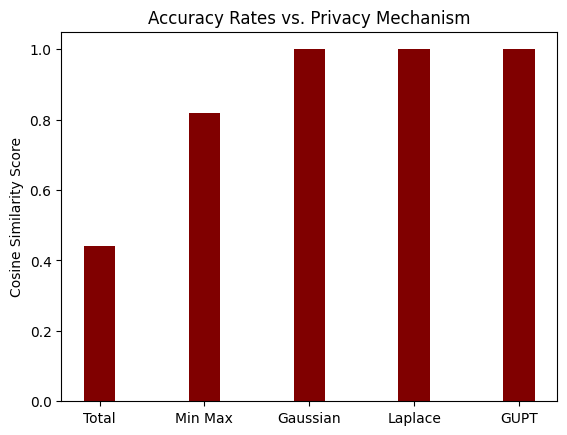

In [54]:
plt.bar(labels, scores, color ='maroon',
        width = 0.3)
plt.title("Accuracy Rates vs. Privacy Mechanism")
plt.ylabel("Cosine Similarity Score")